- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)


## 3.2 기본 통계로 질문자 되기
### 3.2.18 두 개 이상의 변수 관계를 이해할 때 알아야 할 개념
#### 3.2.18.1 공분산, 상관계수, 선형성 (Page 292)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal 

# 그래프 관련 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# matplotlib 폰트 설정 (Mac OS인 경우) 및 유니코드 에러 고치기 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

plt.rc('font', size=14) # 글씨 크기 설정
plt.rc('figure', figsize=[16,8]) # 그래프 크기설정

def multi_norm_3d(mu_list, Sigma_list): 
    '''
    입력값(리스트): 평균, 분산-공분산행렬 
    출력값(그래프): 주어진 값에 따른 다변량 정규분포 그래프
    '''  
    # 2차원 그래프 범위 설정
    N = 100
    X = np.linspace(-7, 7, N) # 범위 [-7, 7] X축 70개 간격생성, 1xN 행렬
    Y = np.linspace(-7, 7, N) # 범위 [-7, 7] Y축 70개 간격생성, 1xN 행열
    X, Y = np.meshgrid(X, Y) # 2차원 평면 X, Y에 격자점 생성, NxN 행렬

    # 3차원 배열 생성 
    pos = np.empty(X.shape + (2,)) # 요소가 지정되지 않은 비어있는 배열 생성, (N, N, 2) 
    pos[:, :, 0] = X 
    pos[:, :, 1] = Y

    # 깊이, 행, 열 배열 NxNx2 - 파이썬설치 및 개념설명 (xx. p) 참고
    # print(len(pos), len(pos[0]), len(pos[0][0])) # 

    # 평균 1차원 배열, 분산-공분산 2x2 행렬 설정
    mu = np.array(mu_list)
    Sigma = np.array(Sigma_list)
    Z = multivariate_normal(mu, Sigma).pdf(pos) # 다변량정규분포 확률밀도값
    
    # 3차원 그래프 
    fig = plt.figure()
    ax = fig.gca(projection='3d') # 3D좌표로 기준 설정
    ax.plot_surface(X, Y, Z,  # 표면 플롯 생성
                    rstride=2, # 행 방향으로 3간격
                    cstride=2, # 열 방향으로 3간격
                    linewidth=1, # 선 두께
                    cmap=cm.coolwarm)

    # 등고선 그래프 생성
    cset = ax.contourf(X, Y, Z, 
                       offset=-0.15, # Z축 -0.15 값에 그래프 생성
                       cmap=cm.coolwarm) # 비슷한 값 끼리 보여줄 색 설정

    ax.set_zlim(-0.15,0.1) # # Z축 범위 설정
    ax.set_zticks(np.linspace(0, 0.12, 4)) # Z축 눈금 값 설정
    ax.view_init(15, 290) # 3D 그래프 방향 설정
    ax.set_xlabel('X축: 변수 $X_1$')
    ax.set_ylabel('Y축: 변수 $X_2$')
   
    # 눈금값 크기 조절 및 라벨과의 간격 설정
    ax.tick_params(axis='x', labelsize=12, pad=0)
    ax.tick_params(axis='y', labelsize=12, pad=-1.5) 
    ax.tick_params(axis='z', labelsize=12, pad=10)
    ax.text2D(0.05, 0.95, f'$X_1$ 평균: {mu[0]},  $X_2$ 평균: {mu[1]}', transform=ax.transAxes) # 텍스트 추가
    ax.text2D(0.05, 0.90, f'$X_1$ 분산: {Sigma[0][0]},  $X_2$ 분산: {Sigma[1][1]},  공분산: {Sigma[0][1]}', transform=ax.transAxes)
    plt.savefig(f'3장_이변량그래프_{mu[0]}_{Sigma[0][0]}_{Sigma[0][1]}.png', bbox_inches='tight')
    
    return plt.show()


/var/folders/bj/vyhj_k290_97p48w_81tkhfc0000gp/T/ipykernel_82722/3761479270.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 3D좌표로 기준 설정


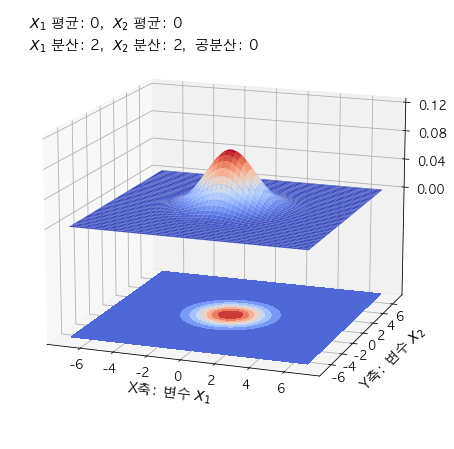

In [2]:
multi_norm_3d([0, 0], [[2, 0], 
                             [0, 2]])


/var/folders/bj/vyhj_k290_97p48w_81tkhfc0000gp/T/ipykernel_82722/3761479270.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 3D좌표로 기준 설정


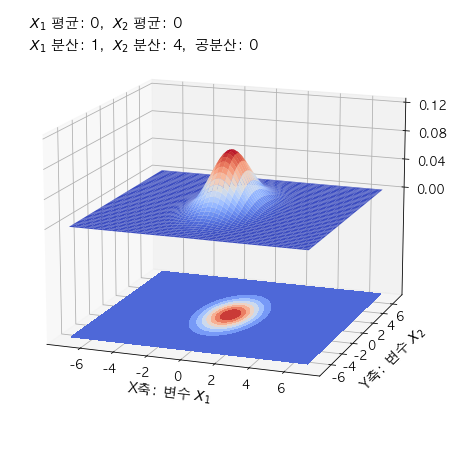

In [3]:
multi_norm_3d([0, 0], [[1, 0], 
                             [0, 4]])


/var/folders/bj/vyhj_k290_97p48w_81tkhfc0000gp/T/ipykernel_82722/3761479270.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 3D좌표로 기준 설정


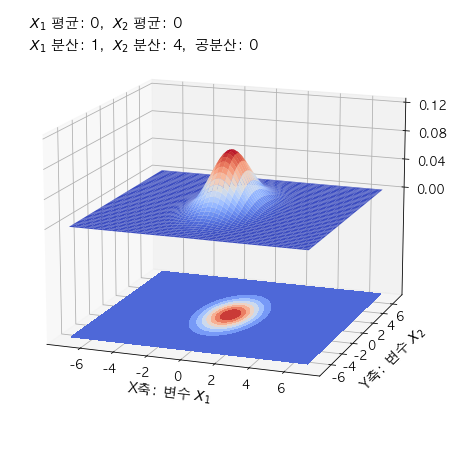

In [4]:
multi_norm_3d([0, 0], [[1, 0], 
                             [0, 4]])


/var/folders/bj/vyhj_k290_97p48w_81tkhfc0000gp/T/ipykernel_82722/3761479270.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 3D좌표로 기준 설정


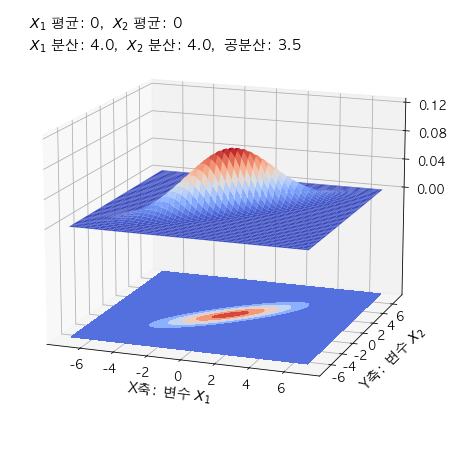

In [5]:
multi_norm_3d([0, 0], [[4, 3.5], 
                    [3.5, 4]])


/var/folders/bj/vyhj_k290_97p48w_81tkhfc0000gp/T/ipykernel_82722/3761479270.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 3D좌표로 기준 설정


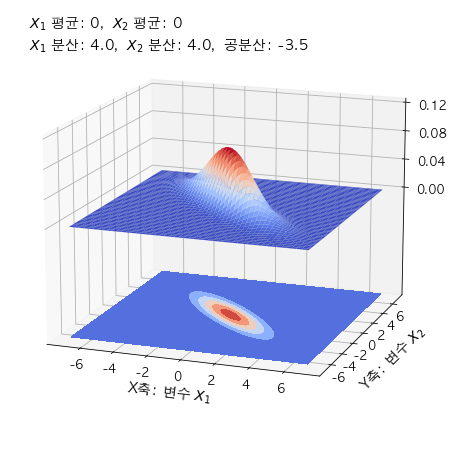

In [6]:
multi_norm_3d([0, 0], [[4, - 3.5], 
                   [- 3.5, 4]])


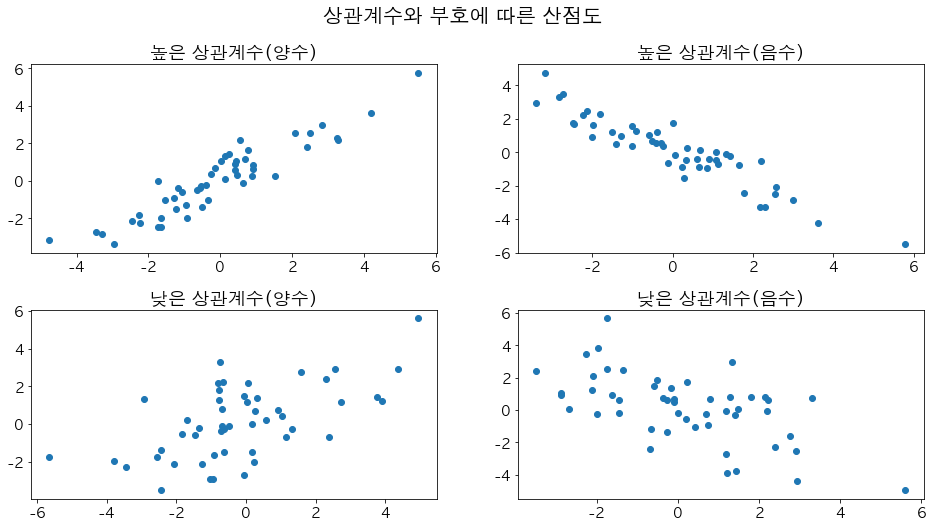

In [7]:
# 이변량 정규분포 무작위 생성 함수
def generate_2rv(mu, sd, corr, size):
    '''
    입력값: 평균(리스트), 표준편차(리스트), 상관계수, 크기
    출력값: 이변량 정규분포 데이터 프레임
    '''
    np.random.seed(21) # 랜덤 시드 설정
    # 표준편차를 분산-공분산으로 바꿈: ** 제곱
    covs = np.array([[sd[0]**2, sd[0]*sd[1]*corr], 
                             [sd[0]*sd[1]*corr, sd[1]**2]])
    
    # 무작위로 이변량 정규분포 만들기
    df_bivar = np.random.multivariate_normal(np.array(mu), covs, size)
    df_bivar = pd.DataFrame(df_bivar) # 데이터 프레임으로 변환
    df_bivar.rename(columns={0:"col1", 1:"col2"}, inplace=True) # 열 이름 변환
    return df_bivar

# 상관계수 변화에 따른 데이터프레임 생성
df_high_p = generate_2rv([0,0], [2, 2], 0.95, 50)
df_high_n = generate_2rv([0,0], [2, 2], -0.95, 50)
df_low_p = generate_2rv([0,0], [2, 2], 0.7, 50)
df_low_n = generate_2rv([0,0], [2, 2], -0.7, 50)

# 그래프로 표현
plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 그래프 간격

plt.subplot(2, 2, 1) # 행2개, 열2개 서브그래프의 첫번째 그래프 
plt.scatter(df_high_p["col1"], df_high_p["col2"]) 
plt.title('높은 상관계수(양수)', fontsize=18)

plt.subplot(2, 2, 2) # 행2개, 열2개 서브그래프의 두번째 그래프 
plt.scatter(df_high_n["col1"], df_high_n["col2"]) 
plt.title('높은 상관계수(음수)', fontsize=18)

plt.subplot(2, 2, 3) # 행2개, 열2개 서브그래프의 세번째 그래프 
plt.scatter(df_low_p["col1"], df_low_p["col2"]) 
plt.title('낮은 상관계수(양수)', fontsize=18)

plt.subplot(2, 2, 4) # 행2개, 열2개 서브그래프의 네번째 그래프 
plt.scatter(df_low_n["col1"], df_low_n["col2"]) 
plt.title('낮은 상관계수(음수)', fontsize=18)

plt.suptitle('상관계수와 부호에 따른 산점도', fontsize=20)
plt.show()



In [8]:
# 검정, 회귀분석, 시계열분석 등을 제공하는 파이썬 패키지 statsmodels 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 소숫점 셋째자리 표기
pd.options.display.float_format = '{:.3f}'.format

mu = np.array([10, 10, 10, 10]) # 평균 동일하게 설정
sd = [1, 2, 3, 4] # 표준편차 다르게 설정
corr = 0.85  
n_size = 1000

# 분산-공분산 행렬
covs = np.array([
                 [sd[0]**2, sd[0]*sd[1]*corr, sd[0]*sd[2]*corr, sd[0]*sd[3]*corr],
                 [sd[1]*sd[0]*corr, sd[1]**2, sd[1]*sd[2]*corr, sd[1]*sd[3]*corr],
                 [sd[2]*sd[0]*corr, sd[2]*sd[1]*corr, sd[2]**2, sd[2]*sd[3]*corr],
                 [sd[3]*sd[0]*corr, sd[3]*sd[1]*corr, sd[3]*sd[2]*corr, sd[3]**2]
                ])      

np.random.seed(21) # 랜덤시드 설정
df_cl = np.random.multivariate_normal(mu, covs, size=n_size) # 다변량 정규분포 생성
df_cl = pd.DataFrame(df_cl) # 데이터 프레임으로 변환

df_cl.rename(columns={0:"col1", 1:"col2", 2:"col3", 3:"col4"}, inplace=True) # 열 이름 변환

# col1에서 스케일 변환한 col5 생성 
df_cl["col5"] = df_cl["col1"]*3 +10

# 상관계수 계산
df_cl.corr()

 



,col1,col2,col3,col4,col5
col1,1.000,0.877,0.870,0.875,1.000
col2,0.877,1.000,0.859,0.867,0.877
col3,0.870,0.859,1.000,0.866,0.870
col4,0.875,0.867,0.866,1.000,0.875
col5,1.000,0.877,0.870,0.875,1.000


In [9]:
# VIF 계산 함수 생성 
def get_vif(df):
    '''
    입력값: 데이터프레임
    출력값: VIF
    '''
    vif = pd.DataFrame() # 반환할 VIF 데이터 프레임 
    vif["열"] = df.columns
    
    # df의 열 모두 VIF 계산 (df.shape[1]: 열 개수)
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

df_cl_vif = get_vif(df_cl)
df_cl_vif


,열,VIF
0,col1,5247.923
1,col2,5.734
2,col3,5.478
3,col4,5.822
4,col5,4373.508


In [10]:
# 데이터프레임에서 col1 열 지우기 
df_cl_drop = df_cl.drop(["col1"],axis=1)
df_cl_vif_drop = get_vif(df_cl_drop)

df_cl_vif_drop


,열,VIF
0,col2,132.151
1,col3,55.979
2,col4,30.420
3,col5,63.675


In [11]:
# 메모리 사용량 확인
df_cl.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1000 non-null   float64
 1   col2    1000 non-null   float64
 2   col3    1000 non-null   float64
 3   col4    1000 non-null   float64
 4   col5    1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.